# Objective

To supplement fif=gures for the thesis report. This notebook was created to not clutter the main analysis Jupyter Notebook

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import contextily as cx # for base map


# __1. Show  Study Boundary Shapefile__

In [2]:
# read shapefile
study_boundary = gpd.read_file('Study Area Boundary Polygon\Double Province Boundary\Province_Boundary.shp')
# Reproject to EPSG 4326 (WGS 84)
study_boundary = study_boundary.to_crs(epsg=4326)

C:\Users\varoc\AppData\Local\Temp\ipykernel_17040\1054894593.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


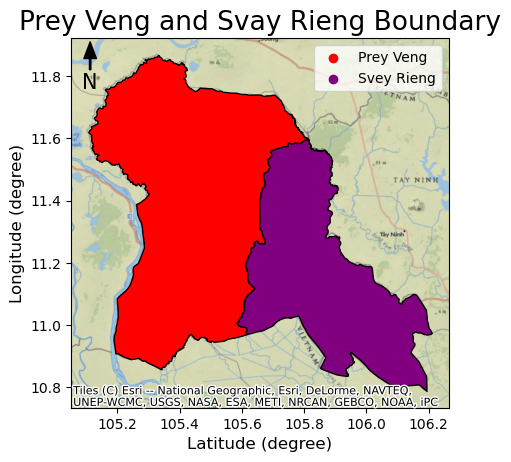

In [3]:
fig, ax = plt.subplots()
study_boundary.loc[0:0].plot(ax = ax, edgecolor = 'k', facecolor = 'red', label = 'Prey Veng')
study_boundary.loc[1:1].plot(ax = ax, edgecolor = 'k', facecolor = 'purple', label = 'Svey Rieng')
cx.add_basemap(ax, crs = study_boundary.crs.to_string(),
               source = cx.providers.Esri.NatGeoWorldMap)

# Add a legend to label colors
legend_labels = {'Prey Veng': 'Red', 'Svey Rieng': 'Purple'}
for label, color in legend_labels.items():
    ax.scatter([], [], c=color, label=label)  # Create empty scatter plot points for legend



# aesthetics
ax.set_ylabel('Longitude (degree)', fontsize = 12)
ax.set_xlabel('Latitude (degree)', fontsize = 12)
ax.set_title('Prey Veng and Svay Rieng Boundary', fontsize = 19)

x, y, arrow_length = 0.05, 0.99, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=9),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)
ax.legend()

In [4]:
# read shape file for Cambodia
cambodia_provinces = gpd.read_file('Study Area Boundary Polygon\Basic map of Cambodia (2014)\province\khm_admbnda_adm1_gov.shp')
# Reproject to EPSG 4326 (WGS 84)
cambodia_provinces = cambodia_provinces.to_crs(epsg=4326)

C:\Users\varoc\AppData\Local\Temp\ipykernel_17040\3301227812.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc = 'lower right')


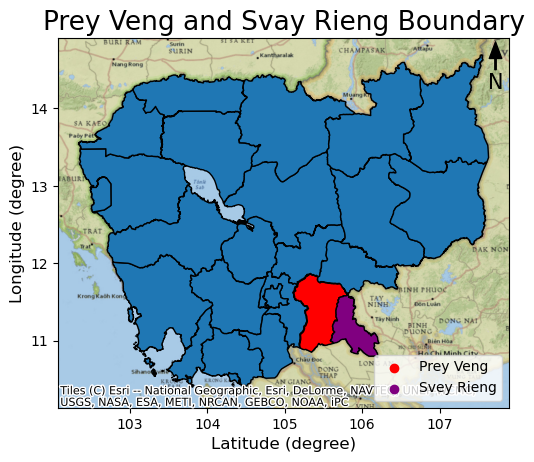

In [5]:
# plot Cambodia and study area 
fig, ax = plt.subplots()
cambodia_provinces.plot(ax = ax, edgecolor = 'k', label = 'Cambodia Provinces', legend= True)
cambodia_provinces.loc[3:3].plot(ax = ax, edgecolor = 'k', label = 'Prey Veng', facecolor = 'Red', legend = True)
cambodia_provinces.loc[4:4].plot(ax = ax, edgecolor = 'k', label = 'Svey Rieng', facecolor = 'Purple', legend = True)


cx.add_basemap(ax, crs = cambodia_provinces.crs.to_string(),
               source = cx.providers.Esri.NatGeoWorldMap)

# Add a legend to label colors
legend_labels = {'Prey Veng': 'Red', 'Svey Rieng': 'Purple'}
for label, color in legend_labels.items():
    ax.scatter([], [], c=color, label=label)  # Create empty scatter plot points for legend


# aesthetics
ax.set_ylabel('Longitude (degree)', fontsize = 12)
ax.set_xlabel('Latitude (degree)', fontsize = 12)
ax.set_title('Prey Veng and Svay Rieng Boundary', fontsize = 19)
x, y, arrow_length = 0.97, 0.99, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=9),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)
ax.legend(loc = 'lower right')

C:\Users\varoc\AppData\Local\Temp\ipykernel_17040\3219075441.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[0].legend(loc = 'lower right')
C:\Users\varoc\AppData\Local\Temp\ipykernel_17040\3219075441.py:56: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[1].legend(loc = 'center right')


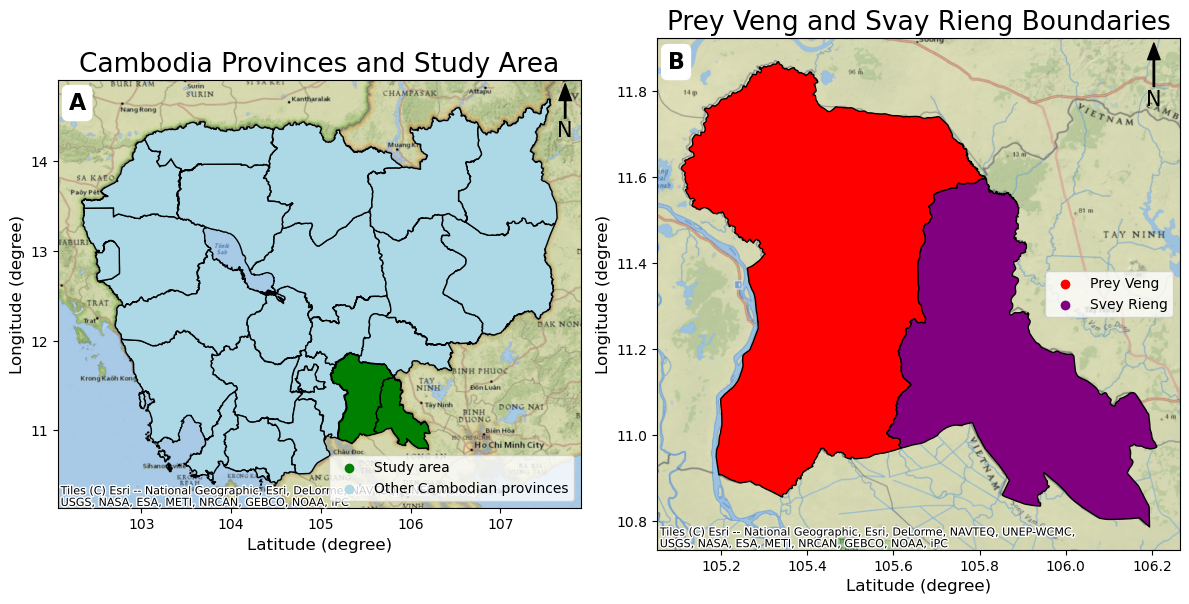

In [6]:
import matplotlib.gridspec as gridspec

### plot study area and Cambodia Provinces 
fig, ax = plt.subplots(1,2, figsize = (12, 8))


### plot Cambodia and study area 
cambodia_provinces.plot(ax = ax[0], edgecolor = 'k', label = 'Cambodia Provinces', legend= True, facecolor = 'LightBlue')
cambodia_provinces.loc[3:3].plot(ax = ax[0], edgecolor = 'k', label = 'Prey Veng', facecolor = 'Green', legend = True)
cambodia_provinces.loc[4:4].plot(ax = ax[0], edgecolor = 'k', label = 'Svey Rieng', facecolor = 'Green', legend = True)


cx.add_basemap(ax[0], crs = cambodia_provinces.crs.to_string(),
               source = cx.providers.Esri.NatGeoWorldMap)

# Add a legend to label colors
legend_labels = {'Study area': 'Green', 'Other Cambodian provinces': 'LightBlue'}
for label, color in legend_labels.items():
    ax[0].scatter([], [], c=color, label=label)  # Create empty scatter plot points for legend


# aesthetics
ax[0].set_ylabel('Longitude (degree)', fontsize = 12)
ax[0].set_xlabel('Latitude (degree)', fontsize = 12)
ax[0].set_title('Cambodia Provinces and Study Area', fontsize = 19)
x, y, arrow_length = 0.97, 0.99, 0.11
ax[0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=9),
            ha='center', va='center', fontsize=15,
            xycoords=ax[0].transAxes)
ax[0].legend(loc = 'lower right')

### plot Prey Veng snd Svey Rieng Province
study_boundary.loc[0:0].plot(ax = ax[1], edgecolor = 'k', facecolor = 'red', label = 'Prey Veng')
study_boundary.loc[1:1].plot(ax = ax[1], edgecolor = 'k', facecolor = 'purple', label = 'Svey Rieng')
cx.add_basemap(ax[1], crs = study_boundary.crs.to_string(),
               source = cx.providers.Esri.NatGeoWorldMap)

# Add a legend to label colors
legend_labels = {'Prey Veng': 'Red', 'Svey Rieng': 'Purple'}
for label, color in legend_labels.items():
    ax[1].scatter([], [], c=color, label=label)  # Create empty scatter plot points for legend



# aesthetics
ax[1].set_ylabel('Longitude (degree)', fontsize = 12)
ax[1].set_xlabel('Latitude (degree)', fontsize = 12)
ax[1].set_title('Prey Veng and Svay Rieng Boundaries', fontsize = 19)

x, y, arrow_length = 0.95, 0.99, 0.11
ax[1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=9),
            ha='center', va='center', fontsize=15,
            xycoords=ax[1].transAxes)
ax[1].legend(loc = 'center right')

### Add plot labels A and B in bold

ax[0].text(0.02, 0.93, 'A', fontsize=16, weight='bold', transform=ax[0].transAxes, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round'))
ax[1].text(0.02, 0.94, 'B', fontsize=16, weight='bold', transform=ax[1].transAxes, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round'))


plt.tight_layout()

# Show where the pixel counts for camparing the 2 methods were made

In [10]:
# read the shape file for pixel count area
count1 = gpd.read_file('Pixel area count\ciu.shp')
count2 = gpd.read_file('Pixel area count\ciu2.shp')

# # Reproject to EPSG 4326 (WGS 84)
count1 = count1.to_crs(epsg=4326)
count2 = count2.to_crs(epsg=4326)

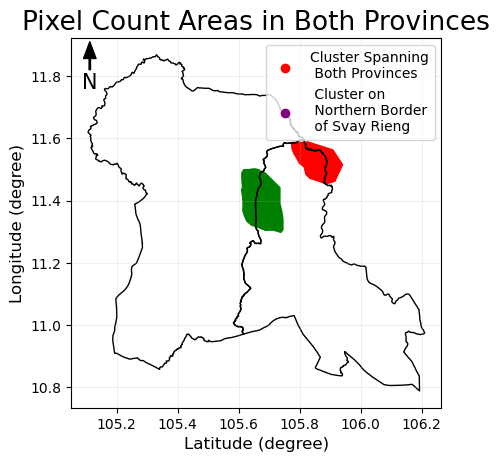

In [29]:
fig, ax = plt.subplots()
count1.plot(ax=ax, facecolor = 'green')
count2.plot(ax = ax, facecolor = 'red')
study_boundary.plot(ax = ax, facecolor = 'none')

# Add a legend to label colors
legend_labels = {'Cluster Spanning\n Both Provinces ': 'Red', ' Cluster on\n Northern Border\n of Svay Rieng': 'Purple'}
for label, color in legend_labels.items():
    ax.scatter([], [], c=color, label=label)  # Create empty scatter plot points for legend


ax.set_ylabel('Longitude (degree)', fontsize = 12)
ax.set_xlabel('Latitude (degree)', fontsize = 12)
ax.set_title('Pixel Count Areas in Both Provinces', fontsize = 19)

x, y, arrow_length = 0.05, 0.99, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=9),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)
ax.grid(alpha = 0.2)
ax.legend()